In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("dataset/NBAFreeThrows/free_throws.csv")
print(df.head())

  end_result       game      game_id  period  \
0  106 - 114  PHX - LAL  261031013.0     1.0   
1  106 - 114  PHX - LAL  261031013.0     1.0   
2  106 - 114  PHX - LAL  261031013.0     1.0   
3  106 - 114  PHX - LAL  261031013.0     1.0   
4  106 - 114  PHX - LAL  261031013.0     1.0   

                                    play        player playoffs    score  \
0   Andrew Bynum makes free throw 1 of 2  Andrew Bynum  regular    0 - 1   
1   Andrew Bynum makes free throw 2 of 2  Andrew Bynum  regular    0 - 2   
2   Andrew Bynum makes free throw 1 of 2  Andrew Bynum  regular  18 - 12   
3  Andrew Bynum misses free throw 2 of 2  Andrew Bynum  regular  18 - 12   
4   Shawn Marion makes free throw 1 of 1  Shawn Marion  regular  21 - 12   

        season  shot_made   time  
0  2006 - 2007          1  11:45  
1  2006 - 2007          1  11:45  
2  2006 - 2007          1   7:26  
3  2006 - 2007          0   7:26  
4  2006 - 2007          1   7:18  


In [3]:
succes_by_quater =  df.groupby(['period', 'playoffs']).shot_made.sum().unstack()
total_by_quater = df.groupby(['period', 'playoffs']).shot_made.count().unstack()
succes_by_quater['playoff_rate'] = succes_by_quater['playoffs']/total_by_quater['playoffs']
succes_by_quater['regular_rate'] = succes_by_quater['regular'] / total_by_quater['regular']

succes_by_quater = succes_by_quater.drop([6,7,8])
succes_by_quater = succes_by_quater.assign(period = list(range(1,6)))



print(succes_by_quater.head(10))
print(succes_by_quater.columns)

playoffs  playoffs   regular  playoff_rate  regular_rate  period
period                                                          
1.0         5856.0   82602.0      0.752699      0.756553       1
2.0         7825.0  108338.0      0.745096      0.753834       2
3.0         7935.0  109260.0      0.754206      0.760932       3
4.0         9743.0  131108.0      0.755799      0.756149       4
5.0          302.0    3927.0      0.801061      0.775780       5
Index(['playoffs', 'regular', 'playoff_rate', 'regular_rate', 'period'], dtype='object', name='playoffs')


Text(0.5, 1.0, 'Free throw success rate between regular season and playoffs by period')

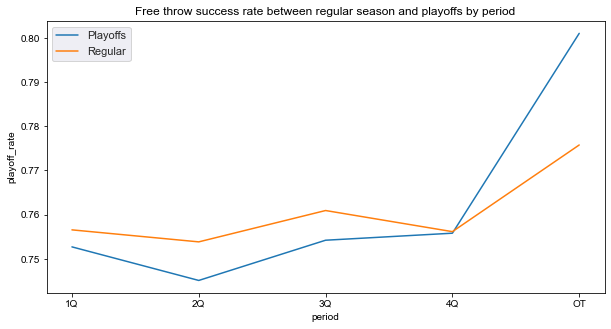

In [4]:
f,ax = plt.subplots(figsize=(10,5))
sns.set(style="darkgrid")
sns.lineplot(x="period", y="playoff_rate",data=succes_by_quater)
sns.lineplot(x="period", y="regular_rate",data=succes_by_quater)
plt.legend(['Playoffs','Regular'])
ax.set_xticks(succes_by_quater["period"])
ax.set_xticklabels(['1Q','2Q','3Q','4Q','OT'])
ax.set_title('Free throw success rate between regular season and playoffs by period')

In [5]:
name_split2 = df.season.str.split(' - ')
df['season_cleaned'] = name_split2.str.get(0)
df['season_cleaned'] = df.season_cleaned.astype(int)

succes_by_season =  df.groupby(['season_cleaned', 'playoffs']).shot_made.sum().unstack()
total_by_season = df.groupby(['season_cleaned', 'playoffs']).shot_made.count().unstack()
succes_by_season['playoff_rate'] = succes_by_season['playoffs']/total_by_season['playoffs']
succes_by_season['regular_rate'] = succes_by_season['regular'] / total_by_season['regular']


succes_by_season = succes_by_season.assign(season = list(range(2006,2016)))


print(succes_by_season)
print(succes_by_season.columns)

playoffs        playoffs  regular  playoff_rate  regular_rate  season
season_cleaned                                                       
2006                3057    47784      0.742711      0.752551    2006
2007                3311    46183      0.755246      0.755661    2007
2008                3384    46936      0.759596      0.770706    2008
2009                3346    45807      0.752417      0.758934    2009
2010                3238    45775      0.773716      0.763527    2010
2011                2995    33471      0.754028      0.752377    2011
2012                3061    40820      0.750613      0.751777    2012
2013                3349    43778      0.763044      0.756084    2013
2014                2936    42069      0.725117      0.750134    2014
2015                3027    43362      0.747223      0.756701    2015
Index(['playoffs', 'regular', 'playoff_rate', 'regular_rate', 'season'], dtype='object', name='playoffs')


Text(0.5, 1.0, 'Free throw success rate between regular season and playoffs by season')

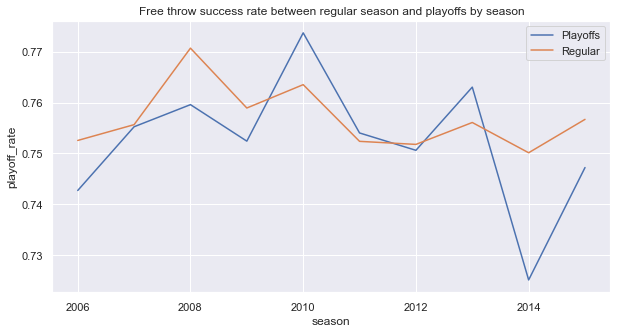

In [6]:
f,ax = plt.subplots(figsize=(10,5))
sns.set(style="darkgrid")
sns.lineplot(x="season", y="playoff_rate",data=succes_by_season)
sns.lineplot(x="season", y="regular_rate",data=succes_by_season)
plt.legend(['Playoffs','Regular'])
ax.set_title('Free throw success rate between regular season and playoffs by season')

In [7]:
""" 
Examples of data cleaning
end result: split into two value 
game : change team names to numeric values
playoffs: regular:0 playoff:1
time: 11:59 ~ 11:00 → 12, 10:59 ~ 10:00 → 11
make the ID for each players
"""

name_split = df.end_result.str.split(' - ')
df['home_score'] = name_split.str.get(0)
df['away_score'] = name_split.str.get(1)
df['home_score'] = df.home_score.astype(int)
df['away_score'] = df.away_score.astype(int)

name_split = df.game.str.split(' - ')
df['home_team'] = name_split.str.get(0)
df['away_team'] = name_split.str.get(1)

team_mapping = {'BOS': 0,'UTAH': 1,'CLE': 2,'GS': 3,'DEN': 4,'LAL': 5,'MIA': 6,'IND': 7,'LAC': 8,'HOU': 9,'CHI': 10,'ORL': 11,'TOR': 12,
                'MEM': 13,'SAC': 14,'SA': 15,'ATL': 16,'DAL': 17, 'WSH': 18,'PHX': 19,'DET': 20,'MIL': 21,'PHI': 22,'NY': 23,'POR': 24,     
                'MIN': 25,'CHA': 26,'NO': 27,'OKC': 28,'NJ': 29,'BKN': 30,'SEA': 31,'EAST': 32,'WEST': 33}



df['home_team_cleaned'] = df.home_team.map(team_mapping)
df['away_team_cleaned'] = df.away_team.map(team_mapping)

df['playoffs_int'] = df.playoffs.map({'regular': 0,'playoffs': 1})


name_split1 = df.time.str.split(':')
df['time_cleaned'] = name_split1.str.get(0)
df['time_cleaned'] = df.time_cleaned.astype(int)

df['period'] = df.period.astype(int)

df['id'] = df.groupby(['player']).ngroup()

name_split = df.play.str.split(' ')
df['made'] = name_split.str.get(5)

def int_str(x):
    if len(x) == 1:
        return int(x)
    else:
        return np.nan
    
df['made_cleaned'] = df.made.apply(lambda x:int_str(str(x)))
df['tried'] = name_split.str.get(7)
df['tried_cleaned'] = df.tried.apply(lambda x:int_str(str(x)))

def made_two_generator(made,tried):
    if made == 2 and tried == 2:
        return 1
    elif made <2 and tried == 2:
        return 0
    elif made <=1 and tried == 1:
        return np.nan
    else:
        return np.nan
        



df['made_two'] = df.apply(lambda x: made_two_generator(x.made_cleaned, x.tried_cleaned), axis=1)

print(df.isna().any())
print(df.dtypes)
df_ml = df[['home_score','away_score','home_team_cleaned','away_team_cleaned','player','shot_made','playoffs_int','time_cleaned','season_cleaned','period']]
df = df.dropna(subset = ['made_two'])
print(len(df))

end_result           False
game                 False
game_id              False
period               False
play                 False
player               False
playoffs             False
score                False
season               False
shot_made            False
time                 False
season_cleaned       False
home_score           False
away_score           False
home_team            False
away_team            False
home_team_cleaned    False
away_team_cleaned    False
playoffs_int         False
time_cleaned         False
id                   False
made                  True
made_cleaned          True
tried                 True
tried_cleaned         True
made_two              True
dtype: bool
end_result            object
game                  object
game_id              float64
period                 int64
play                  object
player                object
playoffs              object
score                 object
season                object
shot_made              in

In [8]:
lebron_james = df_ml.loc[df_ml['player'].isin(['LeBron James'])]
kobe_bryant = df_ml.loc[df_ml['player'].isin(['Kobe Bryant'])]

carmelo_anthony = df_ml.loc[df_ml['player'].isin(['Carmelo Anthony'])]
dwight_howard = df_ml.loc[df_ml['player'].isin(['Dwight Howard'])]


def logisttic_model(df):
    features = df[['home_score','away_score','home_team_cleaned','away_team_cleaned','playoffs_int','time_cleaned','season_cleaned','period']]
    labels = df['shot_made']
    
    train_data,test_data,train_labels,test_labels = train_test_split(features,labels,test_size = 0.20, random_state = 50)
    
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    
    model = LogisticRegression()
    model.fit(train_scaled,train_labels)
    print(model.score(test_scaled,test_labels))
    print(list(zip(['home_score','away_score','home_team_cleaned','away_team_cleaned','playoffs_int','time_cleaned','season_cleaned','period'],model.coef_[0])))
logisttic_model(lebron_james)

0.7545284197376639
[('home_score', 0.04604104735071421), ('away_score', 0.02766007690749235), ('home_team_cleaned', 0.09546455404631328), ('away_team_cleaned', 0.06545068226428988), ('playoffs_int', 0.006377348811091074), ('time_cleaned', -0.03326177075511395), ('season_cleaned', -0.023184719956830906), ('period', 0.029594605620513942)]


In [9]:
logisttic_model(kobe_bryant)

0.838248436103664
[('home_score', 0.031219741137817315), ('away_score', 0.08082698099157389), ('home_team_cleaned', 0.004462051082190198), ('away_team_cleaned', 0.07757077551336743), ('playoffs_int', 0.023031873685546843), ('time_cleaned', -0.05890038722221389), ('season_cleaned', -0.10275473672172525), ('period', -0.023479857207412556)]


In [10]:
logisttic_model(carmelo_anthony)

0.8289473684210527
[('home_score', 0.07347693451819397), ('away_score', -0.00409083185409344), ('home_team_cleaned', 0.0019981522186146433), ('away_team_cleaned', 0.029807017639827526), ('playoffs_int', 0.05733506939150611), ('time_cleaned', -0.0436741836150782), ('season_cleaned', 0.08439801908676649), ('period', 0.0100974593247576)]


In [11]:
logisttic_model(dwight_howard)

0.5595084087968952
[('home_score', 0.08147324681891265), ('away_score', 0.029502757547145573), ('home_team_cleaned', 0.005379791955442687), ('away_team_cleaned', -0.016179657235023348), ('playoffs_int', -0.0058961528439295295), ('time_cleaned', -0.05608530401569509), ('season_cleaned', -0.16100984615985986), ('period', -0.008552017631119058)]


In [13]:
def id_generator(df,name):
    name_df = df.loc[df['player'].isin([name])]
    id_list = []
    name_df = name_df.id.apply(lambda x:id_list.append(x))
    return id_list[0]
    

print(id_generator(df,'LeBron James'))
print(id_generator(df,'Ben Wallace'))
print(id_generator(df,'Dwight Howard'))
print(id_generator(df,'Kobe Bryant'))
print(id_generator(df,'Dirk Nowitzki'))
print(id_generator(df,'Carmelo Anthony'))

661
93
321
628
303
150


In [14]:
#try to improve lebrons score
# can the model predict whether player make both of their free throws

# divide into features and labels

features = df[['home_team_cleaned','away_team_cleaned','playoffs_int','time_cleaned','season_cleaned','period','id']]
labels = df['made_two']

#divide into train and test sets
train_data,test_data,train_labels,test_labels = train_test_split(features,labels,test_size = 0.20,random_state = 50)

#normalize data

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)


#load sample data for prediction

"""
1
home team : CLE
away team : BOS
playoffs : regular
period : 4
Player : Lebron James

2
home team : DTL
away team : BOS
playoffs : regular
period : 4
Player : Ben Wallace

3
home team : ORL
away team : BOS
playoffs : regular
period : 4
Player : Dwight Howard

4

home team : LAL
away team : BOS
playoffs : regular
period : 4
Player : Kobe Bryant

5
home score : 110
away score : 109
home team : DAL
away team : BOS
playoffs : regular
period : 4
Player : Dirk Nowitzki

6
home team : NYC
away team : BOS
playoffs : regular
period : 4
Player : Carmelo Anthony
"""

sample1 = np.array([2,0,0,0,2008,4,661])
sample2 = np.array([20,0,0,0,2008,4,93])
sample3 = np.array([11,0,0,0,2008,4,321])
sample4 = np.array([5,0,0,0,4,2008,628])
sample5 = np.array([17,0,0,0,4,2008,303])
sample6 = np.array([150,0,0,0,4,2008,150])
sample_score = np.array([sample1,sample2,sample3,sample4,sample5,sample6])
sample = scaler.transform(sample_score)


model = LogisticRegression(C= 0.3,random_state = 50)
model.fit(train_scaled,train_labels)
labels_pred = model.predict(test_scaled)
print(model.score(test_scaled,test_labels))
print(list(zip(['home_team_cleaned','away_team_cleaned','playoffs_int','time_cleaned','season_cleaned','period','id'],model.coef_[0])))


print(model.predict(sample))
free_throw_probability = model.predict_proba(sample)
print(free_throw_probability)

made_shot = []
for i in free_throw_probability :
    made_shot.append(i[1])
made_shot = np.array(made_shot)
rate = np.mean(made_shot)*100.0
rate = np.round_(rate)
print(str(rate)+"%")

0.49724442916224915
[('home_team_cleaned', 0.0031917370662493355), ('away_team_cleaned', -0.0011072885770555525), ('playoffs_int', 0.00044377344494360676), ('time_cleaned', 0.0009507709290578044), ('season_cleaned', 0.0017109204177706732), ('period', 0.0008536385681822607), ('id', -8.191267471465108e-05)]
[0. 1. 0. 1. 1. 1.]
[[0.50104055 0.49895945]
 [0.49936971 0.50063029]
 [0.50020153 0.49979847]
 [0.41691475 0.58308525]
 [0.41583538 0.58416462]
 [0.40414243 0.59585757]]
54.0%


In [15]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_labels, labels_pred)
cnf_matrix

array([[25075, 27228],
       [25409, 26985]])

Text(0.5, 257.44, 'Predicted label')

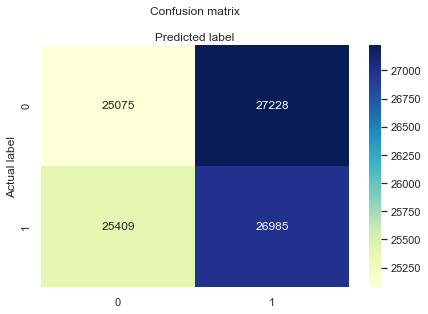

In [16]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
print("Accuracy:",metrics.accuracy_score(test_labels, labels_pred))
print("Precision:",metrics.precision_score(test_labels, labels_pred))
print("Recall:",metrics.recall_score(test_labels, labels_pred))
print("F1:",metrics.f1_score(test_labels, labels_pred, average = 'micro'))

Accuracy: 0.49724442916224915
Precision: 0.49775884013059596
Recall: 0.5150398900637477
F1: 0.49724442916224915
